# ABEL optimization example

By Carl A. Lindstrøm (University of Oslo), 28 May 2024

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the experiment and beam

In [2]:
# define beam
source = SourceBasic()
source.charge = -100e-12 # [pC]
source.energy = 5e6 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 400e-6 # [m]
source.emit_nx, source.emit_ny = 5e-6, 5e-6 # [m rad]
source.beta_x = 10
source.beta_y = source.beta_x
source.num_particles = 10000
source.length = 3 # [m]
source.jitter.x = 100e-6
source.jitter.y = 100e-6
source.jitter.xp = 0.01e-3
source.jitter.yp = 0.01e-3

# define the RF accelerator
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = 200e6 # [eV]
rf_accelerator.length = 20 # [m]

# define the BDS
bds = BeamDeliverySystemBasic()
bds.beta_x = 0.2 # [m]
bds.beta_y = 0.2 # [m]
bds.length = 5 # [m]

# define linac
linac = ConventionalLinac()
linac.source = source
linac.rf_accelerator = rf_accelerator
linac.bds = bds

# define the plasma lens
plasma_lens = PlasmaLensNonlinearThin()
plasma_lens.length = 0.02 # [m]
plasma_lens.current = -1000 # [A]
plasma_lens.radius = 500e-6 # [m]
plasma_lens.rel_nonlinearity = -0.1

# define the spectrometer
spectrometer = SpectrometerBasicCLEAR()
spectrometer.use_otr_screen = True

# assemble 
experiment = ExperimentAPL()
experiment.linac = linac
experiment.plasma_lens = plasma_lens
experiment.spectrometer = spectrometer

In [3]:
experiment.optimize('plasmalens_opti_example', 
                    parameters=[{'name': 'plasma_lens.offset_x', 'type': 'range', 'bounds': [-400e-6, 400e-6]}, 
                                {'name': 'plasma_lens.offset_y', 'type': 'range', 'bounds': [-400e-6, 400e-6]}], 
                    merit_fcn=lambda obj: Beam.x_offset(obj.final_beam)**2 + Beam.y_offset(obj.final_beam)**2,
                    label='offsets', 
                    num_shots_per_step=5,
                    num_steps=10, parallel=True, overwrite=True)

/Users/carlal/UiO/Code/venvs/pyvenv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[INFO 10-28 17:59:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter plasma_lens.offset_x. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 10-28 17:59:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter plasma_lens.offset_y. If that is not the expected value type, you can ex

Output()

[INFO 10-28 17:59:28] ax.service.managed_loop: Running optimization trial 2...


Output()

Merit function (offsets): 4.26e-06
>> plasma_lens.offset_x: 6.88e-07
>> plasma_lens.offset_y: -0.000283


[INFO 10-28 17:59:28] ax.service.managed_loop: Running optimization trial 3...


Output()

Merit function (offsets): 5.64e-06
>> plasma_lens.offset_x: -0.000337
>> plasma_lens.offset_y: 3.1e-05


[INFO 10-28 17:59:28] ax.service.managed_loop: Running optimization trial 4...


Output()

Merit function (offsets): 1.04e-05
>> plasma_lens.offset_x: 0.000297
>> plasma_lens.offset_y: 0.000307


[INFO 10-28 17:59:28] ax.service.managed_loop: Running optimization trial 5...


Output()

Merit function (offsets): 1.24e-05
>> plasma_lens.offset_x: 0.000367
>> plasma_lens.offset_y: 0.000316


[INFO 10-28 17:59:29] ax.service.managed_loop: Running optimization trial 6...


Merit function (offsets): 2.13e-06
>> plasma_lens.offset_x: 0.000196
>> plasma_lens.offset_y: -1.4e-07


Output()

[INFO 10-28 17:59:30] ax.service.managed_loop: Running optimization trial 7...


Merit function (offsets): 1.81e-07
>> plasma_lens.offset_x: 3.82e-05
>> plasma_lens.offset_y: -4.39e-05


Output()

[INFO 10-28 17:59:31] ax.service.managed_loop: Running optimization trial 8...


Merit function (offsets): 2.57e-07
>> plasma_lens.offset_x: -7.59e-06
>> plasma_lens.offset_y: 6.89e-05


Output()

[INFO 10-28 17:59:32] ax.service.managed_loop: Running optimization trial 9...


Merit function (offsets): 8.86e-06
>> plasma_lens.offset_x: -0.000187
>> plasma_lens.offset_y: 0.0004


Output()

[INFO 10-28 17:59:33] ax.service.managed_loop: Running optimization trial 10...


Merit function (offsets): 6.09e-08
>> plasma_lens.offset_x: -3.38e-05
>> plasma_lens.offset_y: -7.81e-06


Output()

Merit function (offsets): 2.69e-08
>> plasma_lens.offset_x: 1.76e-05
>> plasma_lens.offset_y: 1.09e-05


({'plasma_lens.offset_x': 1.7625905261008416e-05,
  'plasma_lens.offset_y': 1.0935638478918827e-05},
 ({'objective': 1.626328052942095e-08},
  {'objective': {'objective': 2.7285426426731328e-15}}))

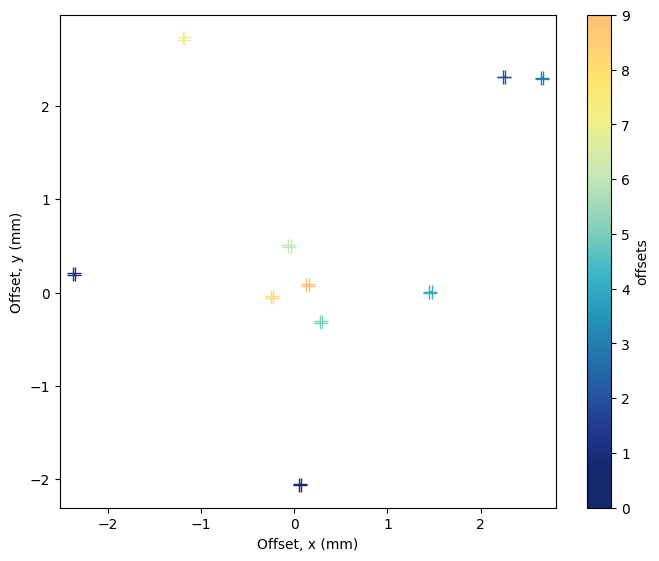

In [4]:
experiment.plot_correlation_offsets()